# Stock Forecasting using pmdarima

https://github.com/alkaline-ml/pmdarima

In [37]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from pmdarima.arima import ndiffs, nsdiffs


import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200
2021-11-05,139.190002,141.220001,134.419998,136.339996,136.339996,64878000


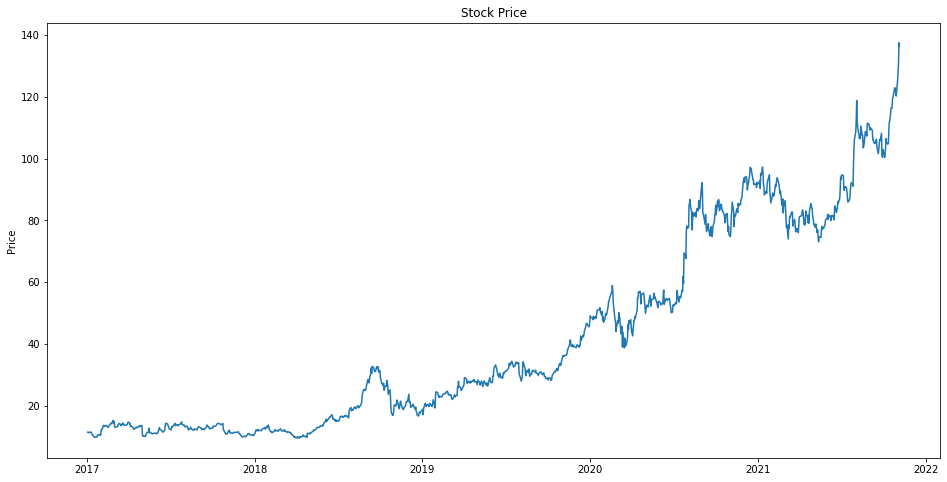

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [7]:
auto_arima = pm.auto_arima(df['Adj Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1221
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2242.456
Date:                Sat, 13 Nov 2021   AIC                           4496.912
Time:                        22:40:07   BIC                           4527.551
Sample:                             0   HQIC                          4508.444
                               - 1221                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3678      0.158      2.332      0.020       0.059       0.677
ar.L1         -1.6062      0.011   -146.858      0.000      -1.628      -1.585
ar.L2         -0.9759      0.010    -97.598      0.000      -0.995      -0.956
ma.L1          1.5783      0.013    124.692      0.000       1.553       1.603
ma.L2          0.9674      0.012     79.200      0.000       0.943       0.991
sigma2         2.3111      0.051     45.251      0.000       2.211       2.411
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              1552.31
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              25.34   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
auto_arima = pm.auto_arima(df['Adj Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1221
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2242.456
Date:                Sat, 13 Nov 2021   AIC                           4496.912
Time:                        22:40:28   BIC                           4527.551
Sample:                             0   HQIC                          4508.444
                               - 1221                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3678      0.158      2.332      0.020       0.059       0.677
ar.L1         -1.6062      0.011   -146.858      0.000      -1.628      -1.585
ar.L2         -0.9759      0.010    -97.598      0.000      -0.995      -0.956
ma.L1          1.5783      0.013    124.692      0.000       1.553       1.603
ma.L2          0.9674      0.012     79.200      0.000       0.943       0.991
sigma2         2.3111      0.051     45.251      0.000       2.211       2.411
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              1552.31
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              25.34   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
print("Suggested # of differences (ADF):", ndiffs(df['Adj Close'], test='adf'))
print("Suggested # of differences (KPSS):", ndiffs(df['Adj Close'], test='kpss'))
print("Suggested # of differences (PP):", ndiffs(df['Adj Close'], test='pp'))

Suggested # of differences (ADF): 1
Suggested # of differences (KPSS): 1
Suggested # of differences (PP): 1


In [20]:
print("Suggested # of differences (OSCB):", nsdiffs(df['Adj Close'], m=12, test='ocsb'))
print("Suggested # of differences (CH):", nsdiffs(df['Adj Close'], m=12, test='ch'))

Suggested # of differences (OSCB): 0
Suggested # of differences (CH): 0


In [40]:
kpss_diffs = ndiffs(df['Adj Close'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df['Adj Close'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print("Estimated differencing term:", n_diffs)

Estimated differencing term: 1


In [44]:
train_len = int(df.shape[0] * 0.8)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['Adj Close'].values
y_test = test_data['Adj Close'].values

print("train samples:" , train_len)
print("test samples", df.shape[0] - train_len)

train samples: 976
test samples 245


In [45]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3299.234, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3305.744, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3295.122, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3296.181, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3306.837, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3295.449, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3295.274, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3297.229, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3296.970, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.675 seconds


In [46]:
print(auto.order)

(1, 1, 0)


In [48]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print("Mean squared error:", mean_squared_error(y_test, forecasts))
print("SMAPE:", smape(y_test, forecasts))

Mean squared error: 4.946180592093183
SMAPE: 1.788233993965501


In [58]:
x = np.arange(df.shape[0])

In [61]:
x

array([   0,    1,    2, ..., 1218, 1219, 1220])

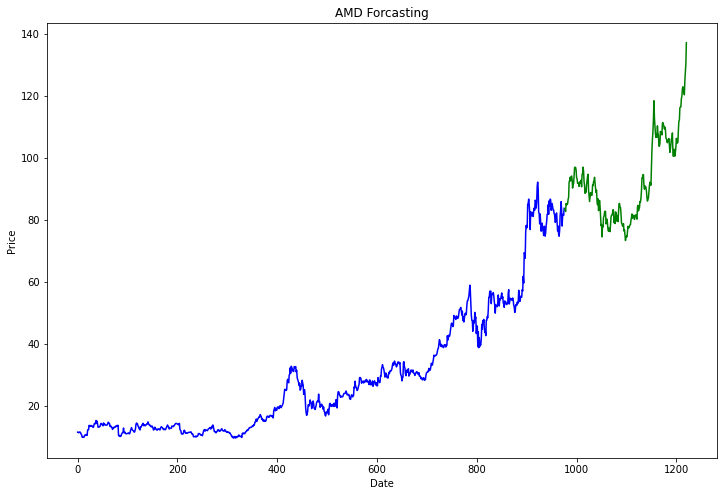

In [70]:
plt.figure(figsize=(12,8))
plt.plot(x[:976], y_train, c='blue')
plt.plot(x[976:], forecasts, c='green')
plt.title(stock + ' Forcasting')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()